In [1]:
import pandas as pd


def load_feather(path):
    return pd.read_feather(path)
!pip install pyarrow
DATA_PATH = '/home/workspace/data/.train/.task149/train/train_c.feather'
data=load_feather(DATA_PATH)

  Using cached pyarrow-2.0.0-cp38-cp38-manylinux2014_x86_64.whl (17.8 MB)
  Using cached numpy-1.19.4-cp38-cp38-manylinux2010_x86_64.whl (14.5 MB)


In [2]:
data_1=data.sort_values(by=['승인일자'], axis=0)
#data_2=data_1.dropna()#
data_3=data_1.rename(columns = {"승인일자": "time", "매출금액": "sales"})
grouped=data_3.groupby(['time', 'a']).sales.sum()
data_a=grouped.to_frame()
import numpy as np
tmp=data_a.reset_index()
tmp

,time,a,sales
0,20190101,1,16452099.0
1,20190101,2,192591991.0
2,20190101,3,209472573.0
3,20190101,4,351841753.0
4,20190101,5,123636087.0
...,...,...,...
2885,20200731,1,63057089.0
2886,20200731,2,315351477.0
2887,20200731,3,264498113.0
2888,20200731,4,768824275.0


In [3]:
tmp.index=np.repeat(pd.date_range('2019-01-01',periods=578),5)
tmp 


,time,a,sales
2019-01-01,20190101,1,16452099.0
2019-01-01,20190101,2,192591991.0
2019-01-01,20190101,3,209472573.0
2019-01-01,20190101,4,351841753.0
2019-01-01,20190101,5,123636087.0
...,...,...,...
2020-07-31,20200731,1,63057089.0
2020-07-31,20200731,2,315351477.0
2020-07-31,20200731,3,264498113.0
2020-07-31,20200731,4,768824275.0


In [4]:
tmp1=tmp.drop('time',axis=1)

<AxesSubplot:>

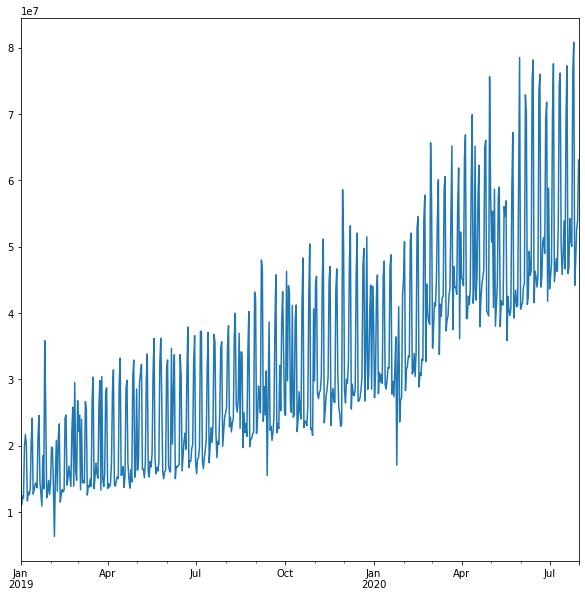

In [5]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize']=10,10
#tmp1['logsales'][0:100].plot()
#plt.ylim(min(tmp1.sales)-10000000, max(tmp1.sales)+10000000)
tmp1[tmp1.a==1]['sales'].plot()

<AxesSubplot:>

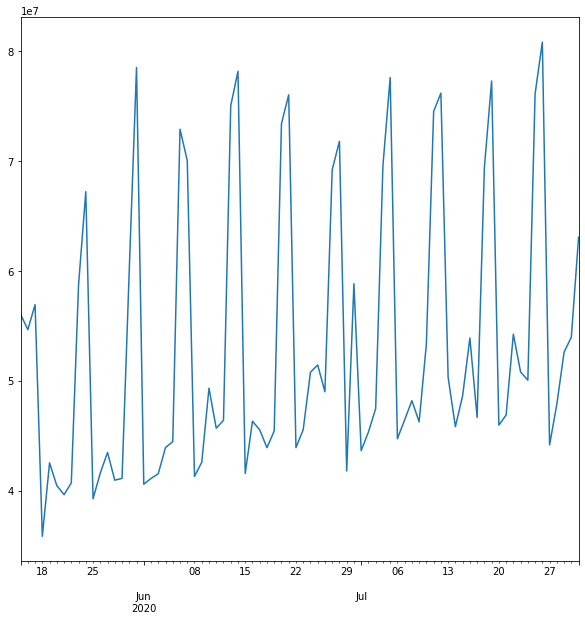

In [6]:
tmp1[tmp1.a==1]['sales'][500:].plot()
#2019-01-26    np.mean([35811113.0,] 24543251.0)   2019-01-20   
#2019-02-05     np.mean([12630299.0,  11494617.0])  2019-01-31       2019-02-11  
#2019-09-13    np.mean([21825375.0 ,22353739.0])    2019-09-02     2019-09-16    
#2020-01-25    np.mean([27412011.0,23560512.0])   2020-01-22      2020-01-28    

In [7]:
tmp1[tmp1.a==1]['sales'][520:580]

2020-06-04    43917868.0
2020-06-05    44445341.0
2020-06-06    72883602.0
2020-06-07    70027798.0
2020-06-08    41284100.0
2020-06-09    42565717.0
2020-06-10    49312548.0
2020-06-11    45669929.0
2020-06-12    46389633.0
2020-06-13    75017650.0
2020-06-14    78150970.0
2020-06-15    41552223.0
2020-06-16    46307253.0
2020-06-17    45521071.0
2020-06-18    43898216.0
2020-06-19    45420793.0
2020-06-20    73381843.0
2020-06-21    76015163.0
2020-06-22    43903363.0
2020-06-23    45531616.0
2020-06-24    50764090.0
2020-06-25    51428081.0
2020-06-26    48985848.0
2020-06-27    69184391.0
2020-06-28    71781147.0
2020-06-29    41776893.0
2020-06-30    58819541.0
2020-07-01    43628992.0
2020-07-02    45321118.0
2020-07-03    47451120.0
2020-07-04    69532450.0
2020-07-05    77582833.0
2020-07-06    44712504.0
2020-07-07    46431303.0
2020-07-08    48180555.0
2020-07-09    46246968.0
2020-07-10    53344735.0
2020-07-11    74501544.0
2020-07-12    76163854.0
2020-07-13    50301167.0


In [8]:
a1=tmp1[tmp1.a==1]

In [9]:
a1.loc['2019-01-26']=    [1,26011113.0]
a1.loc['2019-01-27']=[1,15544873.0]
a1.loc['2019-02-05']    = [1,np.mean([12630299.0,  11494617.0]) ]
a1.loc['2019-09-13']   =[1,np.mean([21825375.0 ,22353739.0])]
a1.loc['2020-01-25']    =[1,np.mean([27412011.0,23560512.0])] 

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1760: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


<AxesSubplot:>

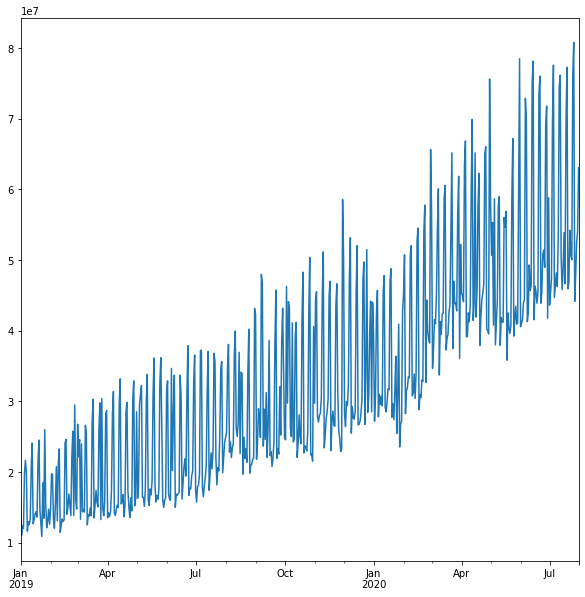

In [10]:
a1['sales'].plot()

<AxesSubplot:>

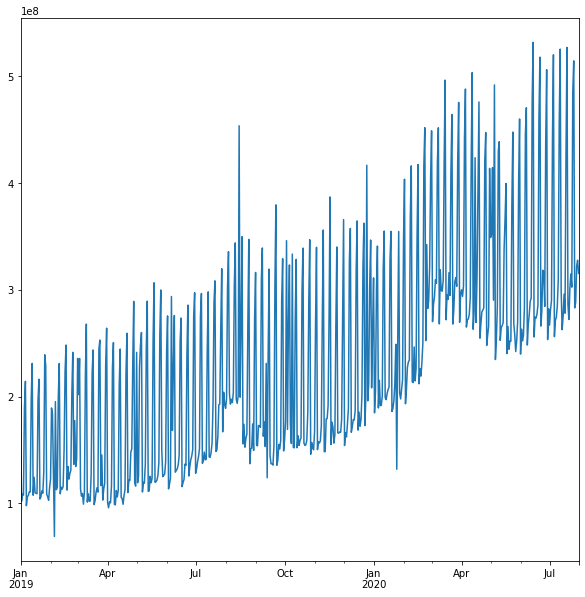

In [11]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize']=10,10
#tmp1['logsales'][0:100].plot()
#plt.ylim(min(tmp1.sales)-10000000, max(tmp1.sales)+10000000)
tmp1[tmp1.a==2]['sales'].plot()

In [12]:
tmp1[tmp1.a==2]['sales'][520:]

2020-06-04    257270119.0
2020-06-05    283662051.0
2020-06-06    445586565.0
2020-06-07    470495156.0
2020-06-08    248350477.0
2020-06-09    267736283.0
2020-06-10    277218281.0
2020-06-11    289246064.0
2020-06-12    292316617.0
2020-06-13    476351828.0
2020-06-14    531787586.0
2020-06-15    255874762.0
2020-06-16    274414183.0
2020-06-17    273516129.0
2020-06-18    277303337.0
2020-06-19    286034897.0
2020-06-20    459546184.0
2020-06-21    517908602.0
2020-06-22    266064240.0
2020-06-23    280015247.0
2020-06-24    318380511.0
2020-06-25    316341844.0
2020-06-26    284492860.0
2020-06-27    437029533.0
2020-06-28    506164383.0
2020-06-29    253471106.0
2020-06-30    282304811.0
2020-07-01    266989949.0
2020-07-02    281576216.0
2020-07-03    290030797.0
2020-07-04    441126969.0
2020-07-05    520072478.0
2020-07-06    256188667.0
2020-07-07    271570697.0
2020-07-08    274331084.0
2020-07-09    285093410.0
2020-07-10    309421400.0
2020-07-11    456636687.0
2020-07-12  

In [13]:
a2=tmp1[tmp1.a==2]
a3=tmp1[tmp1.a==3]

<AxesSubplot:>

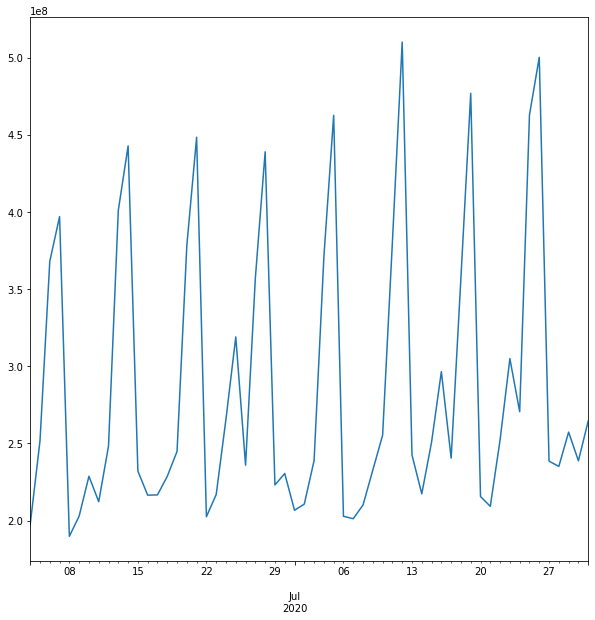

In [14]:
a3['sales'][520:].plot()

In [15]:
a3['sales'][520:]

2020-06-04    197489814.0
2020-06-05    251630551.0
2020-06-06    367904533.0
2020-06-07    396915764.0
2020-06-08    189828033.0
2020-06-09    202932105.0
2020-06-10    228714330.0
2020-06-11    212223184.0
2020-06-12    248310216.0
2020-06-13    400934588.0
2020-06-14    442737568.0
2020-06-15    232059045.0
2020-06-16    216479114.0
2020-06-17    216633138.0
2020-06-18    228641986.0
2020-06-19    244786433.0
2020-06-20    378239841.0
2020-06-21    448344777.0
2020-06-22    202488750.0
2020-06-23    216872470.0
2020-06-24    265892403.0
2020-06-25    318961631.0
2020-06-26    235897838.0
2020-06-27    357158590.0
2020-06-28    438891175.0
2020-06-29    223101849.0
2020-06-30    230515451.0
2020-07-01    206670024.0
2020-07-02    210712666.0
2020-07-03    238913430.0
2020-07-04    370915847.0
2020-07-05    462532292.0
2020-07-06    202777345.0
2020-07-07    201212144.0
2020-07-08    210134073.0
2020-07-09    232752215.0
2020-07-10    255344586.0
2020-07-11    380568966.0
2020-07-12  

<AxesSubplot:>

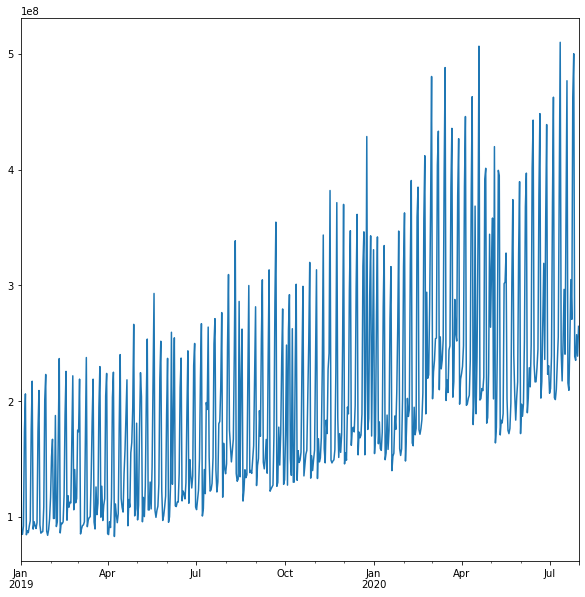

In [16]:
a3['sales'].plot()

In [17]:
a4=tmp1[tmp1.a==4]

<AxesSubplot:>

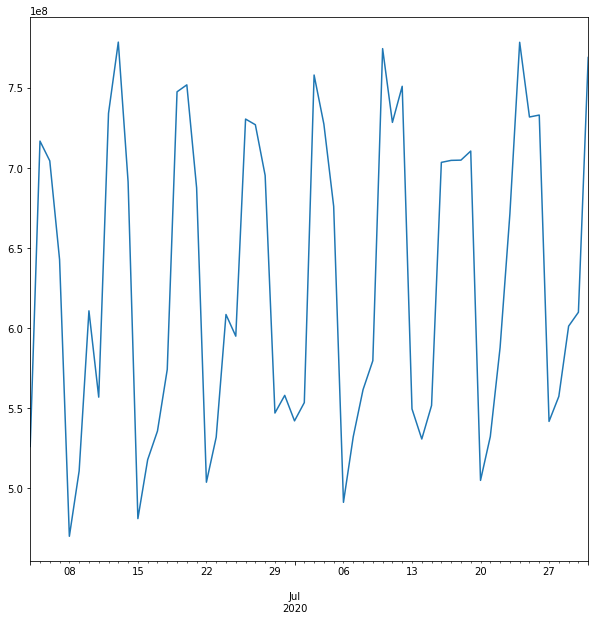

In [18]:
a4['sales'][520:].plot()

In [19]:
a4['sales'][520:]

2020-06-04    526209312.0
2020-06-05    716681506.0
2020-06-06    704342684.0
2020-06-07    642766085.0
2020-06-08    470181426.0
2020-06-09    510948215.0
2020-06-10    610805151.0
2020-06-11    556965058.0
2020-06-12    734019985.0
2020-06-13    778415156.0
2020-06-14    691245804.0
2020-06-15    481209769.0
2020-06-16    517956632.0
2020-06-17    535814253.0
2020-06-18    574237960.0
2020-06-19    747422812.0
2020-06-20    751758245.0
2020-06-21    687514647.0
2020-06-22    503907053.0
2020-06-23    532001731.0
2020-06-24    608512900.0
2020-06-25    595003587.0
2020-06-26    730420822.0
2020-06-27    726885087.0
2020-06-28    695247902.0
2020-06-29    547067231.0
2020-06-30    558082552.0
2020-07-01    542173196.0
2020-07-02    553560268.0
2020-07-03    757887888.0
2020-07-04    727234075.0
2020-07-05    675983943.0
2020-07-06    491369797.0
2020-07-07    532322464.0
2020-07-08    561633951.0
2020-07-09    579700518.0
2020-07-10    774355405.0
2020-07-11    728345918.0
2020-07-12  

In [20]:
a5=tmp1[tmp1.a==5]

<AxesSubplot:>

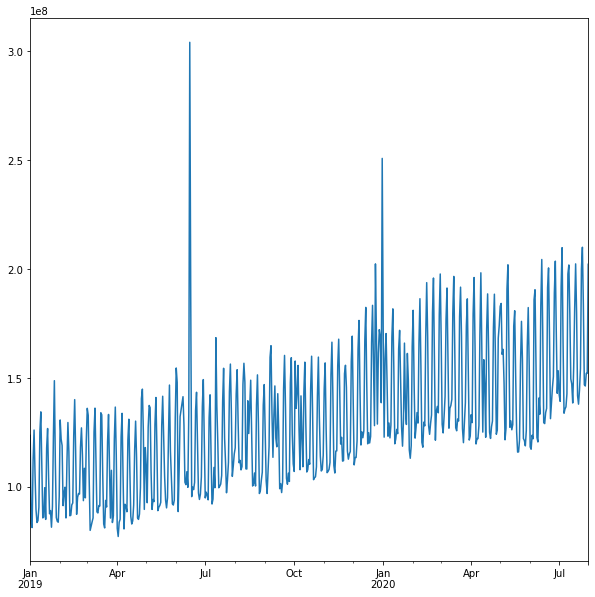

In [21]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize']=10,10
#tmp1['logsales'][0:100].plot()
#plt.ylim(min(tmp1.sales)-10000000, max(tmp1.sales)+10000000)
tmp1[tmp1.a==5]['sales'].plot()

<AxesSubplot:>

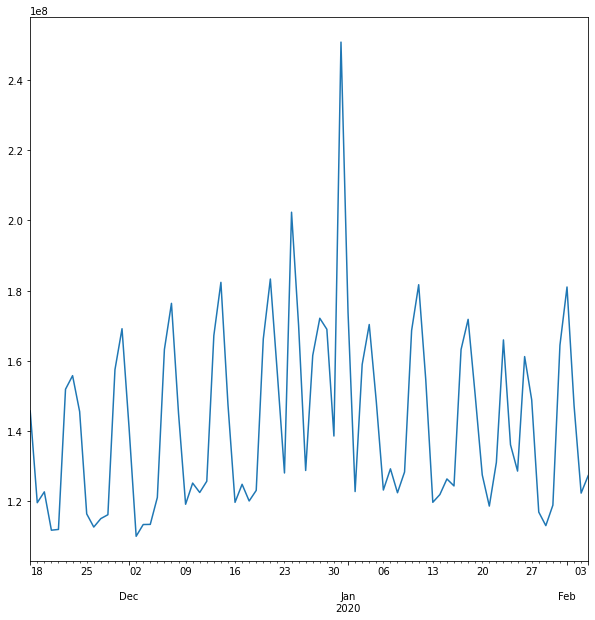

In [22]:
tmp1[tmp1.a==5]['sales'][320:400].plot()
# 2019-06-15    np.means([141389618.0,143413530.0])  2019-06-08       2019-06-22    
#2019-12-31   124878295.0 2019-12-17    

<AxesSubplot:>

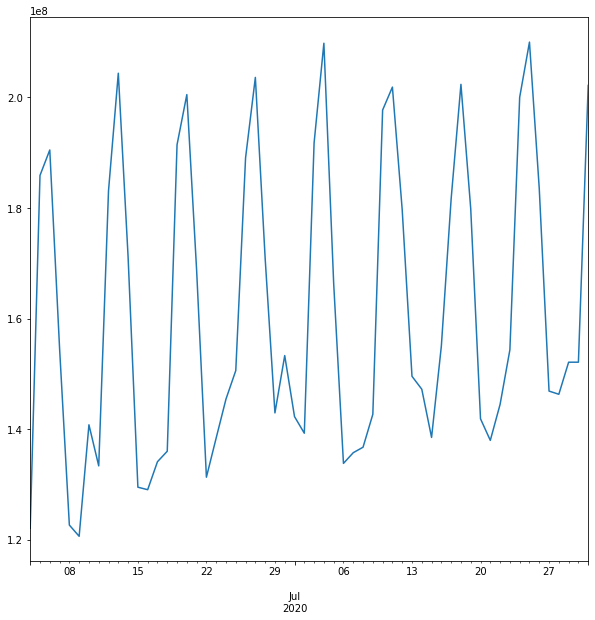

In [23]:
tmp1[tmp1.a==5]['sales'][520:].plot()

In [24]:
tmp1[tmp1.a==5]['sales'][520:]

2020-06-04    122063095.0
2020-06-05    185885892.0
2020-06-06    190490606.0
2020-06-07    154648835.0
2020-06-08    122638748.0
2020-06-09    120607681.0
2020-06-10    140775152.0
2020-06-11    133348730.0
2020-06-12    183106380.0
2020-06-13    204374201.0
2020-06-14    171150589.0
2020-06-15    129488215.0
2020-06-16    129036851.0
2020-06-17    134096166.0
2020-06-18    135992771.0
2020-06-19    191436494.0
2020-06-20    200509468.0
2020-06-21    168747354.0
2020-06-22    131297458.0
2020-06-23    138408829.0
2020-06-24    145436858.0
2020-06-25    150588454.0
2020-06-26    189065436.0
2020-06-27    203618446.0
2020-06-28    170919507.0
2020-06-29    142932921.0
2020-06-30    153299681.0
2020-07-01    142261955.0
2020-07-02    139256385.0
2020-07-03    191766577.0
2020-07-04    209801720.0
2020-07-05    166366148.0
2020-07-06    133794831.0
2020-07-07    135729935.0
2020-07-08    136722020.0
2020-07-09    142673750.0
2020-07-10    197713631.0
2020-07-11    201864667.0
2020-07-12  

In [25]:
tmp1[tmp1.a==5]['sales'][150:210]

2019-05-31    132082019.0
2019-06-01    154564445.0
2019-06-02    147886886.0
2019-06-03     88645027.0
2019-06-04    107500940.0
2019-06-05    132263635.0
2019-06-06    135399916.0
2019-06-07    138473830.0
2019-06-08    141389618.0
2019-06-09    128377782.0
2019-06-10    102115346.0
2019-06-11    100993761.0
2019-06-12    106940873.0
2019-06-13     99766722.0
2019-06-14    133996807.0
2019-06-15    304092297.0
2019-06-16    186371072.0
2019-06-17     95490199.0
2019-06-18     99881491.0
2019-06-19     98734207.0
2019-06-20    102057301.0
2019-06-21    135116595.0
2019-06-22    143413530.0
2019-06-23    120002153.0
2019-06-24     97177515.0
2019-06-25     94207476.0
2019-06-26     96614582.0
2019-06-27    104499728.0
2019-06-28    136900021.0
2019-06-29    149240605.0
2019-06-30    121851802.0
2019-07-01     94909100.0
2019-07-02     97552761.0
2019-07-03     96067152.0
2019-07-04     94027993.0
2019-07-05    131738893.0
2019-07-06    142246257.0
2019-07-07    115328749.0
2019-07-08  

<AxesSubplot:>

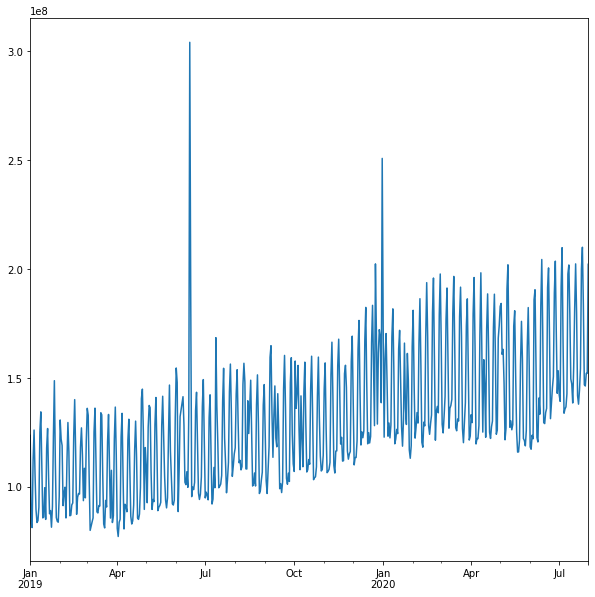

In [26]:
a5['sales'].plot()

In [27]:
a5.loc['2019-06-15']    =[5,np.mean([141389618.0,143413530.0])]
a5.loc['2019-12-31']   =[5,124878295.0]

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1760: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


<AxesSubplot:>

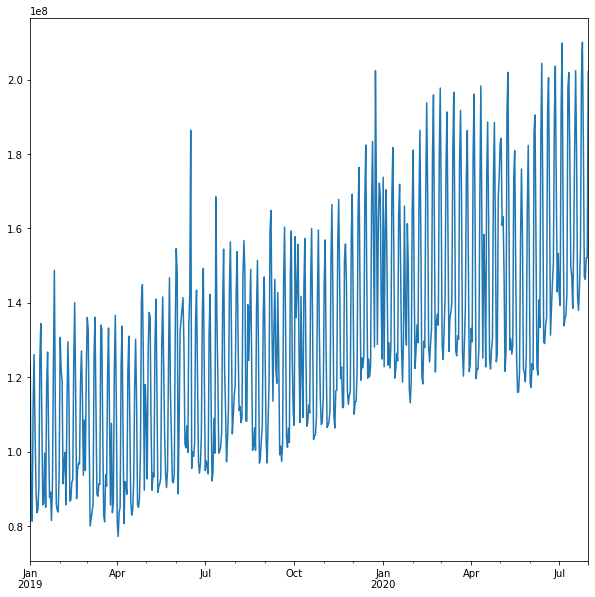

In [28]:
a5['sales'].plot()

<AxesSubplot:>

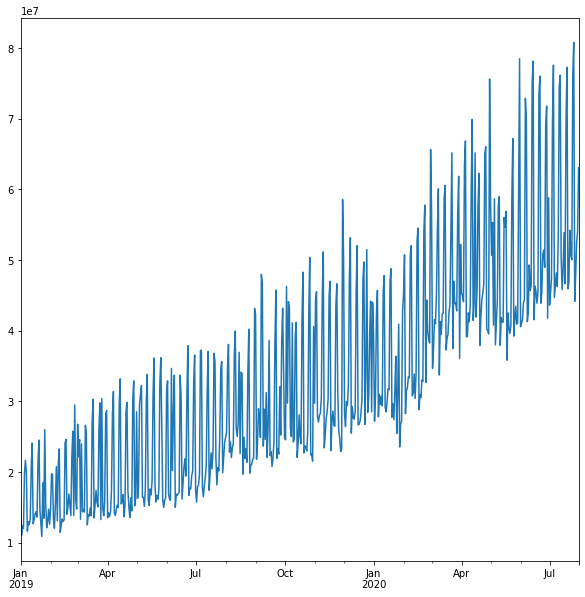

In [29]:
a1['sales'].plot()

<AxesSubplot:>

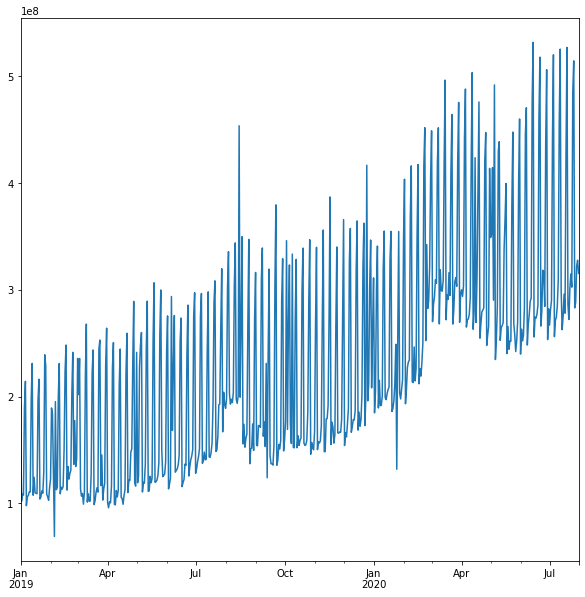

In [30]:
a2['sales'].plot()

<AxesSubplot:>

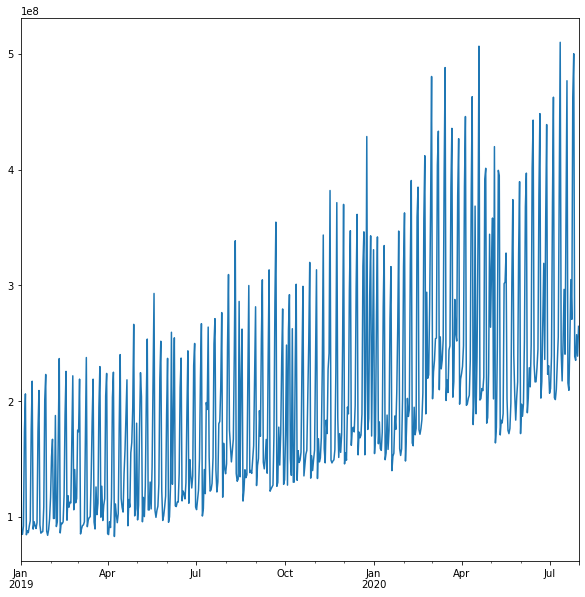

In [31]:
a3['sales'].plot()

<AxesSubplot:>

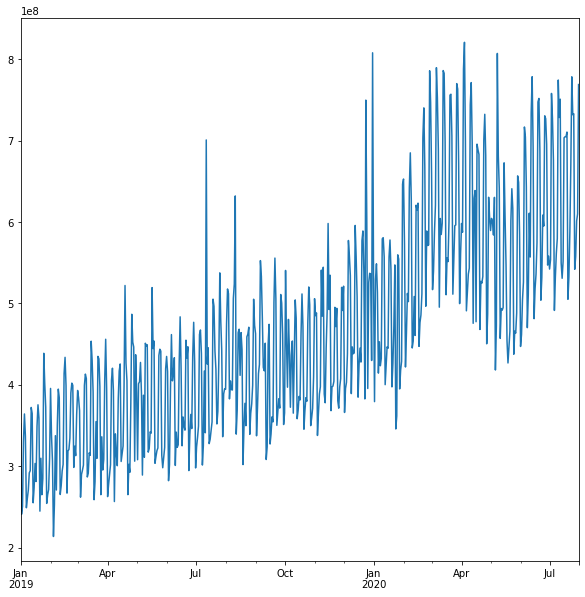

In [32]:
a4['sales'].plot()

<AxesSubplot:>

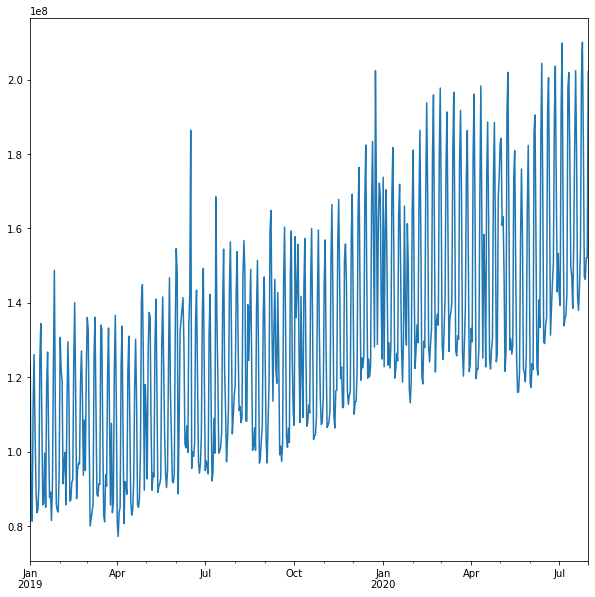

In [33]:
a5['sales'].plot()

In [34]:
a1.to_csv("c_business_time1_edit.csv")
a2.to_csv("c_business_time2_edit.csv")
a3.to_csv("c_business_time3_edit.csv")
a4.to_csv("c_business_time4_edit.csv")
a5.to_csv("c_business_time5_edit.csv")